# Projeto de Análise de Dados

Irei fazer um exercício completo de pandas para um miniprojeto de análise de dados.

### O que tenho?

Tenho os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?

2. Qual foi o faturamento da empresa?<br>
    
3. Qual o % de funcionários que já fechou algum contrato?

4. Calcule o total de contratos que cada área da empresa já fechou

5. Calcule o total de funcionários por área

6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?


### Importação de módulos e Arquivos

In [111]:
import pandas as pd

funcionarios = pd.read_csv(r'CadastroFuncionarios.csv',sep=';', decimal=',')
servicos = pd.read_excel('BaseServiçosPrestados.xlsx')
clientes = pd.read_csv('CadastroClientes.csv', sep=';')

funcionarios = funcionarios.drop(['Estado Civil','Cargo'], axis=1)

display(funcionarios)
display(servicos)
display(clientes)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


### Folha Salarial

In [112]:
funcionarios['gasto funcionario'] = funcionarios['Salario Base'] + funcionarios['Impostos'] + funcionarios['Beneficios'] + funcionarios['VT'] + funcionarios['VR'] 

print('o gasto total com funcionarios foi de R$ {:,}'.format(funcionarios['gasto funcionario'].sum()))

o gasto total com funcionarios foi de R$ 2,717,493.22


### Faturamento da Empresa

In [113]:
faturamento = servicos[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes[['ID Cliente', 'Valor Contrato Mensal']],on= 'ID Cliente')
faturamento['faturamento total']= faturamento['Tempo Total de Contrato (Meses)'] * faturamento['Valor Contrato Mensal']
print('O faturamento da empresa: R$ {:,}'.format(faturamento['faturamento total'].sum()))


O faturamento da empresa: R$ 5,519,160


### % Funcionários que fecharam contrato

In [114]:
print('Quantidade de funcionarios que fecharam contrato: {:.2%} '.format(len(servicos['ID Funcionário'].unique()) / len(funcionarios['ID Funcionário'])))

Quantidade de funcionarios que fecharam contrato: 86.84% 


### Quantidade de contratos por área

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


<AxesSubplot:>

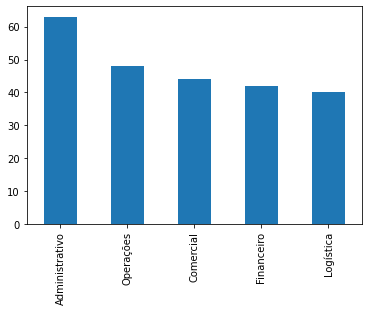

In [115]:
contratos = servicos[['ID Funcionário']].merge(funcionarios[['ID Funcionário','Area']], on='ID Funcionário')
contratos_area = contratos['Area'].value_counts()

print(contratos_area)
contratos_area.plot(kind='bar')

### Funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<AxesSubplot:>

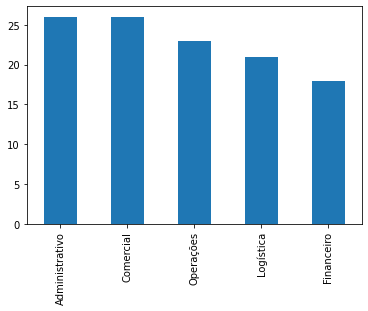

In [116]:
funcionarios_area = funcionarios['Area'].value_counts()
print(funcionarios_area)
funcionarios_area.plot(kind='bar')

### Faturamento médio mensal

In [117]:
faturamento_medio_mensal = clientes['Valor Contrato Mensal'].mean()
print('Ticket médio mensal: R$ {:,.2f}'.format(faturamento_medio_mensal))

Ticket médio mensal: R$ 2,502.56


### Indice de eficiência por departamento

Administrativo    2.423077
Comercial         1.692308
Financeiro        2.333333
Logística         1.904762
Operações         2.086957
Name: Area, dtype: float64


<AxesSubplot:>

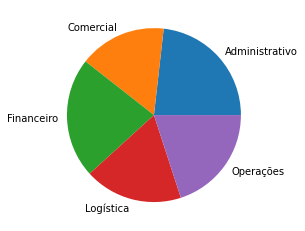

In [135]:
eficiencia = contratos_area/funcionarios_area
print(eficiencia)
eficiencia.plot(kind='pie',ylabel='')